In [84]:
import pandas as pd
import numpy as np
import scipy as sp
import gc
import psutil
import networkx as nx
import collections
import matplotlib.pyplot as plt
import warnings
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')

<h2> Implement Algorithm for Konig's Theorem </h2>

In [78]:
def alternator(seen, vert, isA, M, S, NB):
    if (not isA) and (vert not in S):
        return collections.deque([vert]), True
    if len(NB[vert]-seen)==0:
        return None, False
    seen.add(vert)
    checker = set()
    for neigh in NB[vert]:
        if ((neigh, vert) in M) and (not isA):
            checker.add(neigh)
        elif ((vert, neigh) not in M) and isA:
            checker.add(neigh)
    checker = checker-seen
    for neigh in checker:
        path, valid = alternator(seen.copy(), neigh, not isA, M, S, NB)
        if valid:
            path.appendleft(vert)
            return path, valid
    return None, False

In [79]:
def adjacency(E):
    NB = dict()
    for edge in E:
        for key, value in [(0,1),(1,0)]:
            if not NB.get(edge[key], None):
                NB[edge[key]] = set([edge[value]])
            else:
                NB[edge[key]].add(edge[value])
    return NB

In [104]:
def konig(A, B, E):
    NB = adjacency(E)
    M, S = set(), set()
    while True:
        X_0 = A-S
        total = False
        for elem in X_0:
            path, valid = alternator(set(), elem, True, M, S, NB)
            total = total|valid
            if valid:
                for i in range(0, len(path), 2):
                    if path[i+1] in S:
                        for edge in M:
                            if edge[1]==path[i+1]:
                                M.remove(edge)
                                break
                    M.add((path[i],path[i+1]))
                    S.add(path[i])
                    S.add(path[i+1])
                break
        if (not total):
            break
    #Cover Calculation
    C = set()
    for edge in M:
        C.add(edge[1])
    return M, C

<h2> Visualize Graphs </h2>

In [111]:
def draw_graph(A, B, E):
    G = nx.Graph()
    G.add_nodes_from(A.union(B))
    G.add_edges_from(E)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(4,4))
    M, C = konig(A, B, E)
    edgcol = dict()
    for edge in M:
        edgcol[edge]="red"
    colors = collections.deque()
    for edge in G.edges():
        if (not edgcol.get(edge, False)) and (not edgcol.get((edge[1],edge[0]), False)):
            colors.append("black")
        else:
            colors.append("red")
    nodecol = dict()
    for vert in C:
        nodecol[vert]="green"
    ncolors = collections.deque()
    for vert in G.nodes():
        ncolors.append(nodecol.get(vert, "yellow"))
    nx.draw(G, pos, with_labels=True, edge_color=colors, node_color=ncolors)
    red = mpatches.Patch(color="red", label="Edges in Maximum Matching")
    green = mpatches.Patch(color="green", label="Vertices in Minimum Cover")
    plt.legend(handles=[red,green], loc="lower right")
    plt.show()

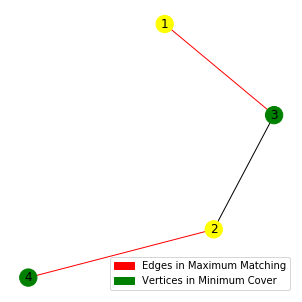

In [113]:
#INVARIANT: Assumption that the input is a bipartite graph. Bipartite recognition in Notebook 1
A = {1,2}
B = {3,4}
E = {(1,3),(2,3),(2,4)}
draw_graph(A,B,E)

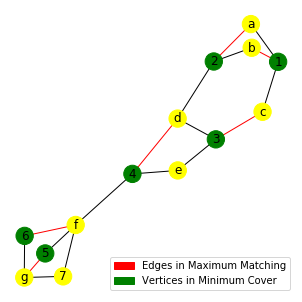

In [115]:
A = {'a','b','c','d','e','f','g'}
B = {1,2,3,4,5,6,7}
E = {('a',1),('a',2),('b',1),('b',2),('c',1),('c',3),('d',2),('d',3),('d',4),('e',3),('e',4),
     ('f',4),('f',5),('f',6),('f',7),('g',5),('g',6),('g',7)}
draw_graph(A,B,E)

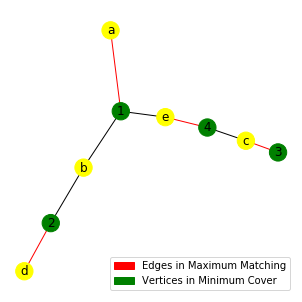

In [116]:
A = {'a','b','c','d','e'}
B = {1,2,3,4}
E = {('a',1),('b',1),('b',2),('c',3),('c',4),('d',2),('e',1),('e',4)}
draw_graph(A,B,E)

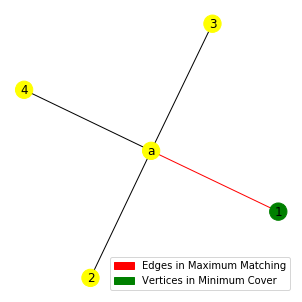

In [130]:
A={'a'}
B = {1,2,3,4}
E = set([('a',v) for v in B])
draw_graph(A,B,E)